In [1]:
# interactive widget imports
import ipywidgets as wg
from IPython.display import display


# data handling modules
import pandas as pd
import numpy as np
from datetime import datetime

# plotting imports
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='Flavioh', api_key='GogTSHQAuhgi5p724TsF')
plt.style.use('seaborn')

# web scraping
from bs4 import BeautifulSoup
import requests

# other helpers and suppress warnings
from helpers import *
from timeline_helpers import *
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

In [2]:
# Load data

data = pd.read_csv('../generated/FINAL_DF_WITH_TOPICS.csv', index_col=0)
data['publish_date'] = pd.to_datetime(data['publish_date'])
# data = data[(data.publish_date > '2016-09-01') & (data.publish_date < '2016-11-10')]

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (6,12,23,24) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
data.head()

,tweet_text,author,publish_date,following,followers,post_type,account_category,userid,tweetid,tweet_time,...,retweet_count,hashtags,urls,user_mentions,poll_choices,follower_count,following_count,last_tweet_at,topic,topic_scores
0,#FoodPoisoning is not a joke! #Walmart #KochFa...,1D_NICOLE_,2015-11-26 22:20:00,48,40,RETWEET,Fearmonger,d077a7eaf7286285c8c406b3d5a6449b51e5ee81d26b5a...,670002488175628293,2015-11-26 22:13:00,...,15,"[FoodPoisoning, Walmart, KochFarms]",[http://www.discusscooking.com/forums/f26/very...,NaN,NaN,107,124,2015-12-15 18:06,Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...
1,#FoodPoisoning is not a joke! #Walmart #KochFa...,BARELYBARBOZA,2015-11-26 22:34:00,50,48,RETWEET,Fearmonger,d077a7eaf7286285c8c406b3d5a6449b51e5ee81d26b5a...,670002488175628293,2015-11-26 22:13:00,...,15,"[FoodPoisoning, Walmart, KochFarms]",[http://www.discusscooking.com/forums/f26/very...,NaN,NaN,107,124,2015-12-15 18:06,Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...
2,#FoodPoisoning is not a joke! #Walmart #KochFa...,D_ANDRE_AUSTIN_,2015-11-26 22:20:00,0,49,RETWEET,Fearmonger,d077a7eaf7286285c8c406b3d5a6449b51e5ee81d26b5a...,670002488175628293,2015-11-26 22:13:00,...,15,"[FoodPoisoning, Walmart, KochFarms]",[http://www.discusscooking.com/forums/f26/very...,NaN,NaN,107,124,2015-12-15 18:06,Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...
3,#FoodPoisoning is not a joke! #Walmart #KochFa...,ERTMANGRETA,2015-11-26 22:20:00,57,50,RETWEET,RightTroll,d077a7eaf7286285c8c406b3d5a6449b51e5ee81d26b5a...,670002488175628293,2015-11-26 22:13:00,...,15,"[FoodPoisoning, Walmart, KochFarms]",[http://www.discusscooking.com/forums/f26/very...,NaN,NaN,107,124,2015-12-15 18:06,Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...
4,#FoodPoisoning is not a joke! #Walmart #KochFa...,FREDYTHECREATOR,2015-11-26 22:34:00,65,50,RETWEET,Fearmonger,d077a7eaf7286285c8c406b3d5a6449b51e5ee81d26b5a...,670002488175628293,2015-11-26 22:13:00,...,15,"[FoodPoisoning, Walmart, KochFarms]",[http://www.discusscooking.com/forums/f26/very...,NaN,NaN,107,124,2015-12-15 18:06,Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...


In [4]:
data_filtered = data[['publish_date', 'followers', 'following', 'author', 'like_count', 'topic']]

In [5]:
data_filtered.topic.value_counts()

Black Support        155980
Sports               123092
Trump Support        122362
Entertainment         92535
Health                44969
Foreign Countries     27271
Crime                 22443
Anti-Islam            19843
Anti-Trump            17311
Patriot               11658
Fukushima               582
Name: topic, dtype: int64

In [6]:
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

def count_topic(topic, df):
    """The function takes in a language as a DEFINE_string
    and goes through a dataframe that has one column named
    topic and another one that has publish_date. It then
    groups the tweets by month and returns the sum of the
    tweets during the time period"""

    filt = df[df.topic == topic].copy()
    filt['topic_num'] = filt.topic.map({topic:1})
    return filt.groupby(pd.Grouper(key='publish_date', freq='1D')).sum()

def trace_generator_topic(topic_df):
    """This function generates the data that will be used
    as input for the iplot function. It prepares the labels
    from the index"""
    data = []
    for topic in topic_df.topic.value_counts().index.values:
        filtered=count_topic(topic, topic_df)
        strd = pd.Series(filtered.index.strftime('%Y-%m-%d %H-%M-%S'))
        xlabels = list(strd.apply(lambda x: x[0:10]))
        trace = go.Scatter(x=xlabels,
                            y=filtered.topic_num.values,
                            fill='tozeroy',
                            mode= 'none',
                            name=topic)
        data.append(trace)

    return data



In [7]:
data = trace_generator_topic(data_filtered)
layout = do_layout('Date', 'Number of Tweets', 'Topic as a Function of Time')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='x')

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Examination of Top Authors

In [8]:
# Extract top 10 posting authors
top_authors = data_filtered.author.value_counts()[0:10]

# Filter data frame for them
###### testing with screamymonkey

test = data_filtered[data_filtered.author.isin(top_authors.index.values)]
# test = data_filtered[data_filtered.author == 'WORLDOFHASHTAGS']


In [9]:
top_authors

SCREAMYMONKEY      41908
MILWAUKEEVOICE     38814
PHOENIXDAILYNEW    33211
ROOMOFRUMOR        28642
TODAYPITTSBURGH    22177
SEATTLE_POST       21111
KANSASDAILYNEWS    17490
DAILYSANJOSE       14070
DAILYSANFRAN       13812
EXQUOTE            11320
Name: author, dtype: int64

In [10]:

data1 = trace_generator_topic(test)
layout = do_layout('Date', 'Number of Tweets', 'Topic for Top 10 Authors Over Time')
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='y')

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [11]:
# Check out follower counts for top 10 hashtaggers

group_followers = test.groupby([pd.Grouper(key='publish_date', freq='1D'), 'author'])['followers'].max().groupby(level=0).sum()

######

test['tweet_counts'] = np.ones(test.shape[0])

group_following =test.groupby([pd.Grouper(key='publish_date', freq='1D'),
                                 'author'])['following'].max().groupby(level=0).sum()
group_authors_time = pd.DataFrame({'followers': group_followers.values,
                                   'following': group_following.values},
                                  index=group_followers.index.values)

 
# group by month
general_timeline = test.groupby(pd.Grouper(key='publish_date', freq='1D')).sum()
# construct labels
xlabels = list(pd.Series(group_authors_time.index.strftime(
    '%Y-%m-%d %H-%M-%S')).apply(lambda x: x[0:10]))
data = []

for col in group_authors_time:
    filtered = group_authors_time[col].copy()
    trace = go.Scatter(x=xlabels, y=filtered.values, name=col, 
                       fill='tozeroy', mode='lines')
    data.append(trace)

filtered = general_timeline['tweet_counts'].copy()
trace=go.Scatter(x=xlabels, y=filtered.values, marker = {'color' : '#00AA00'}, name='Tweet Counts', fill='tozeroy', mode='lines')
data.append(trace)




# Create plots for following, followers, updates, tweet_counts

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(data[0], 1, 1)
fig.append_trace(data[1], 1, 1)
fig.append_trace(data[2], 2, 1)

fig['layout'].update(height=600, width=800, title='General Trends Across Time')
py.iplot(fig, filename='y')


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



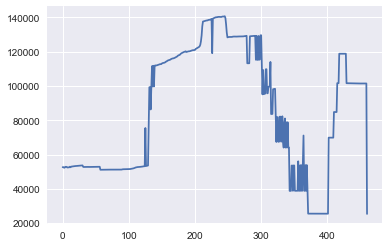

In [13]:
plt.plot(group_followers.values)

# Swing State Stuff

In [14]:
import requests
from bs4 import BeautifulSoup
import lxml

# Scrape wikipedia table for american cities and states
website = requests.get('https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population').text
soup = BeautifulSoup(website,'html.parser')

My_table = soup.find('table',{'class':'wikitable sortable'})

links = My_table.find_all('a')

places = []
for link in links:
    places.append(link.get('title'))
    
city_clean = list(filter(None.__ne__, places)) # Drop None values
cities = {}


for entry in city_clean:
    split=entry.split(', ')
    if len(split) == 1:
        cities[split[0]] = []
    else:
        if split[1] in cities.keys():
            cities[split[1]].append(split[0]) 
state_n_city = []
for state in cities.keys():
    state_list = []
    state_cities = cities[state]
    for city in state_cities:
        state_list.append(city + '|' + city.lower())
    state_list.append(state + '|' + state.lower())
    state_list = '|'.join(state_list)
    state_n_city.append([state, state_list])
    
state_n_city_dict = {}
for state in state_n_city:
    state_n_city_dict[state[0]] = state[1]

In [16]:
with open('../generated/state_n_city.pickle', 'wb') as handle:
    pickle.dump(state_n_city_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)